In [2]:
import pandas as pd
import numpy as np 
import seaborn as  sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [18]:
#Reading the Dataset
df=pd.read_csv('pima-data.csv')

In [19]:
df.drop(columns='skin',inplace=True)

In [21]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [22]:
#Cheking the Numebr of Cols and Rows
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} number of columns')

There are 768 rows and 9 number of columns


In [23]:
#SUMMARY OF THE DATASET
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [25]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

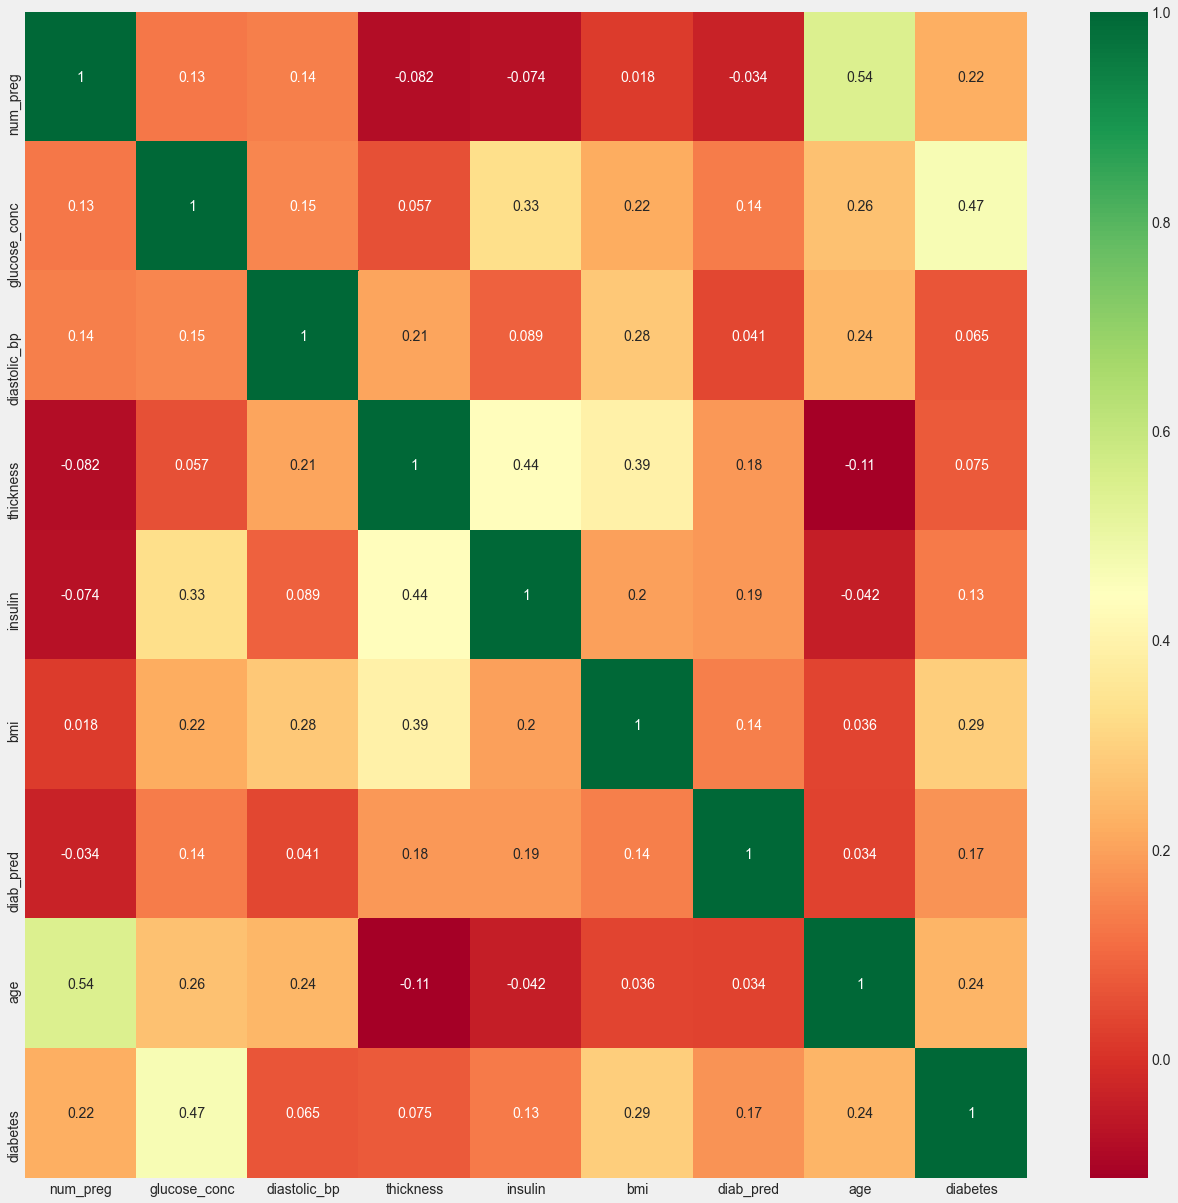

In [26]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [28]:
#Mapping the diabetes values with true as 1 and False as 0
diabetes_map={True:1,False:0}

In [29]:
#Changing the Diabetes column from boolean values into numeric 
df['diabetes']=df['diabetes'].map(diabetes_map)

In [30]:
# Cheking the changes
df.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### EXPLORATORY DATA ANALYSIS

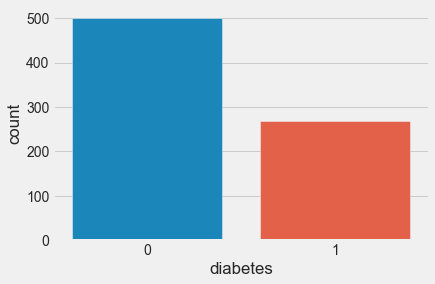

In [14]:
sns.countplot(x = "diabetes", data =df)

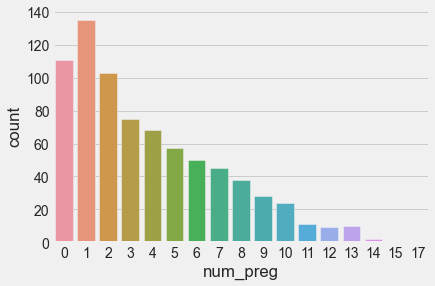

In [32]:
sns.countplot(x = "num_preg", data =df)

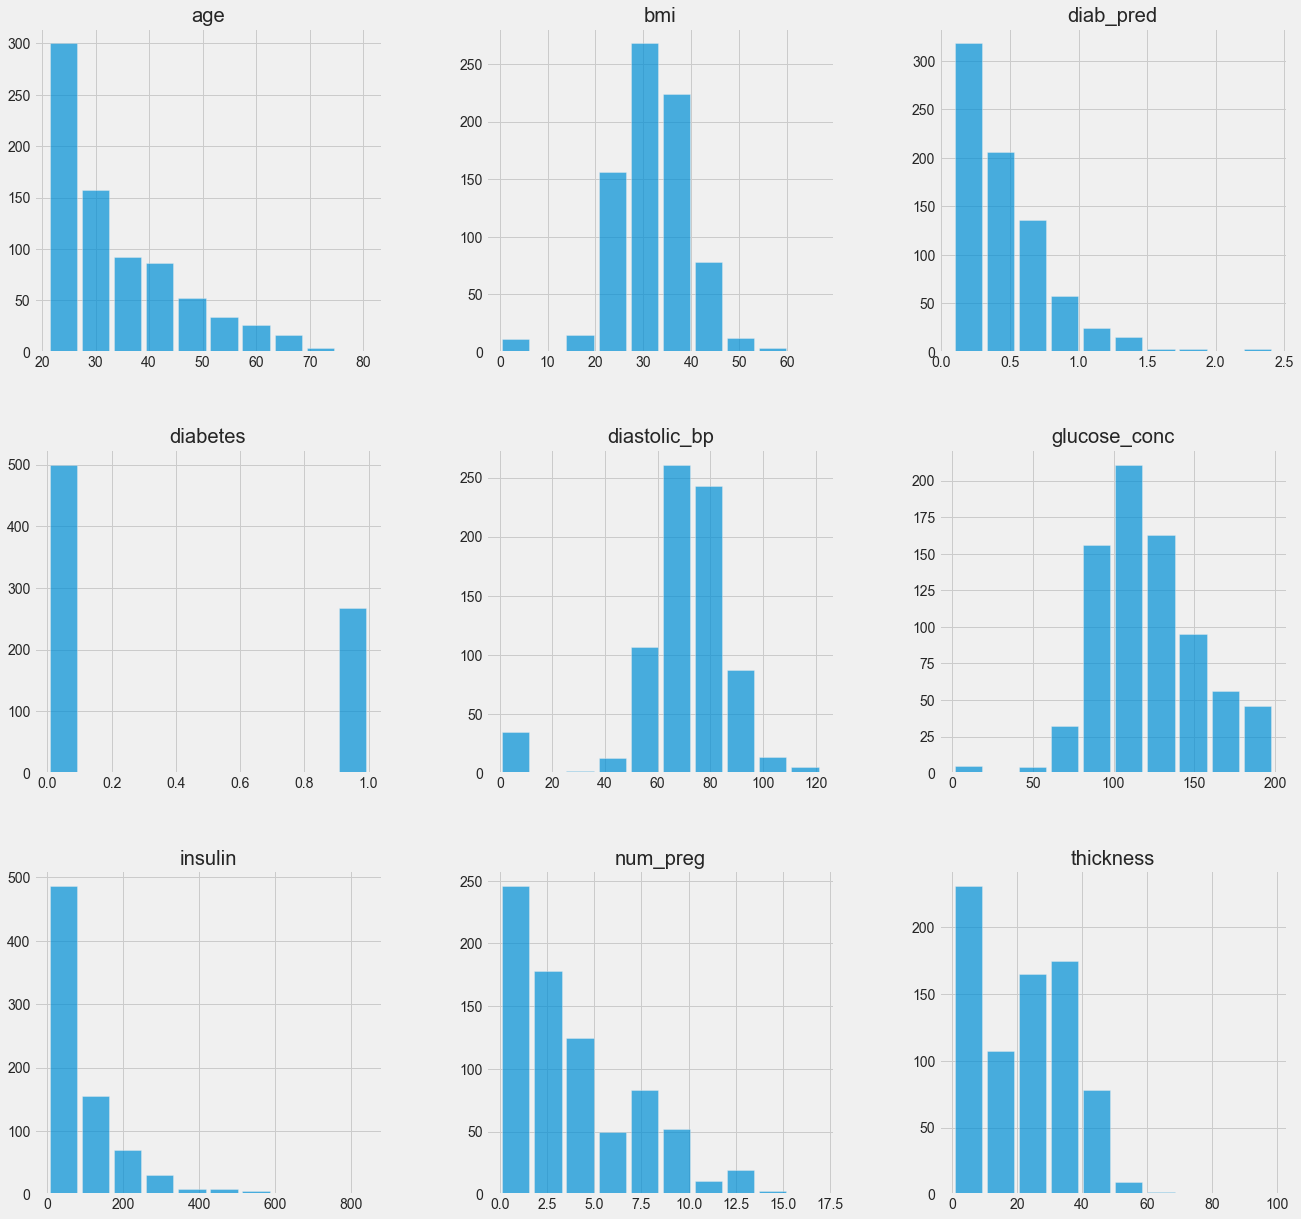

In [33]:
fig=df.hist(figsize = (20,20),alpha=0.7, rwidth=0.85)

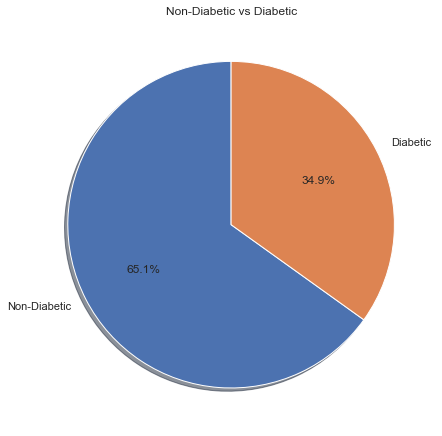

In [34]:
sns.set(style="whitegrid")
labels = ['Non-Diabetic', 'Diabetic']
sizes = df['diabetes'].value_counts(sort = True)
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Non-Diabetic vs Diabetic')
plt.show()

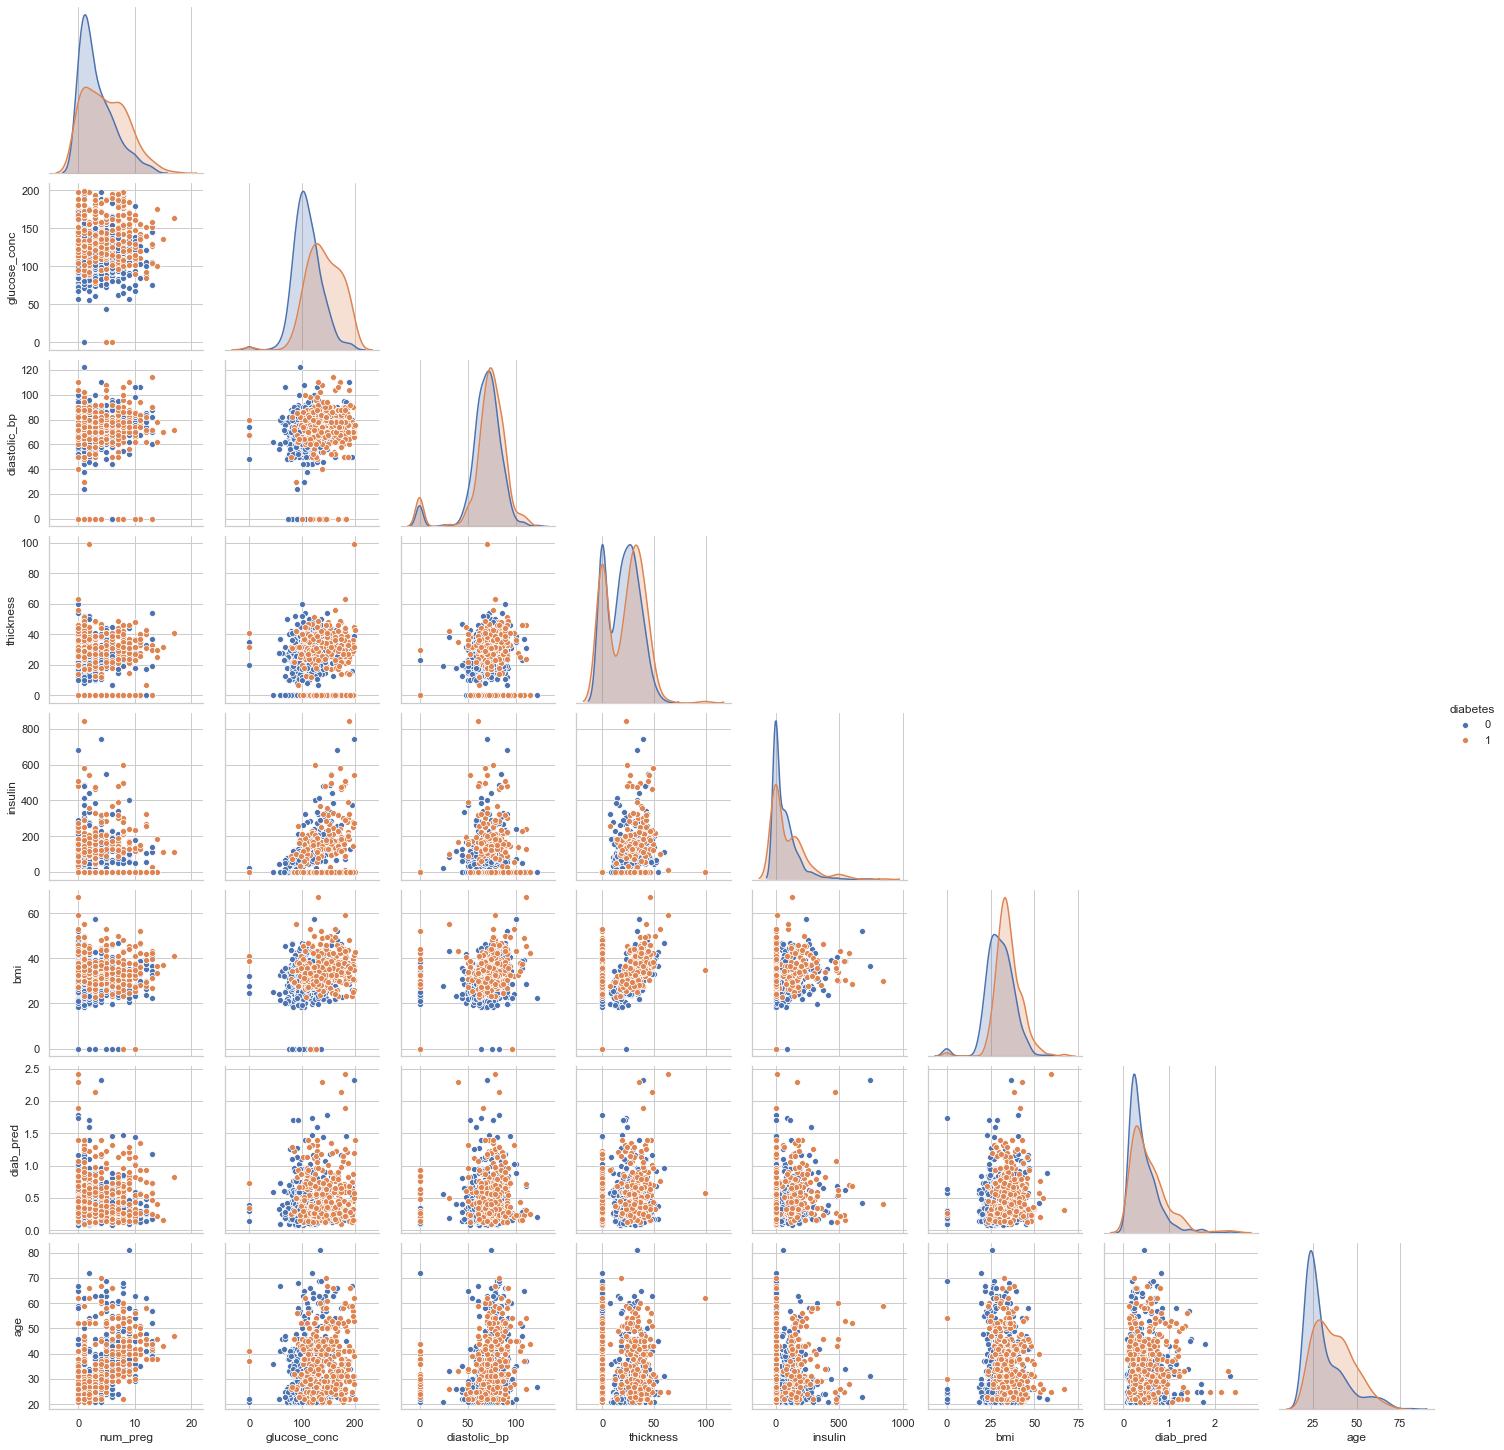

In [35]:
sns.pairplot(data=df,hue="diabetes",corner=True)
plt.show()

In [38]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


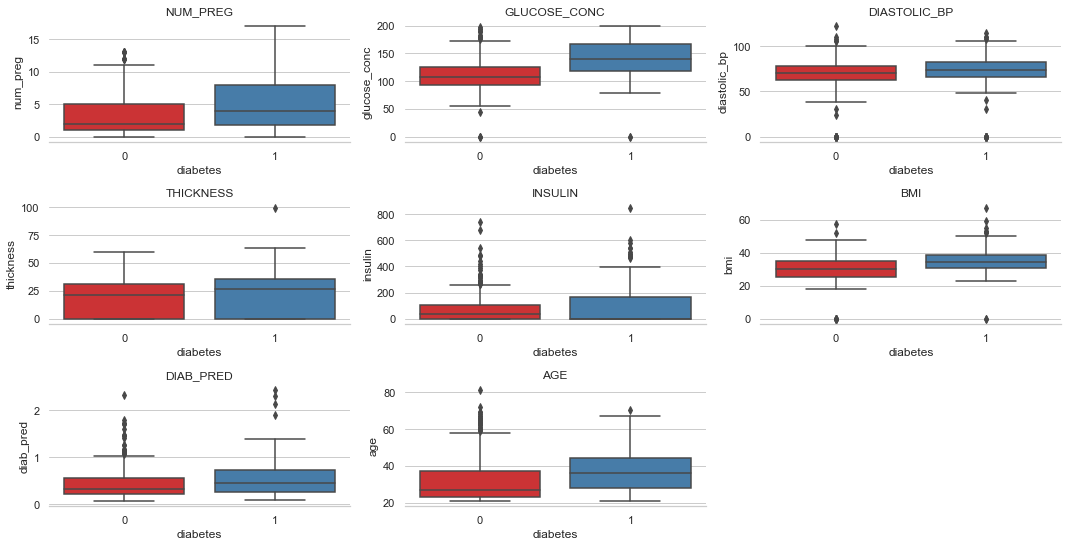

In [39]:
numeric_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age',]

plt.figure(figsize=(15,25))
sns.set_palette(sns.color_palette("Set1", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        sns.boxplot(x='diabetes',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

In [40]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [43]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

# TRAIN TEST SPLIT

In [44]:
X=df.drop(columns='diabetes')
y=df.diabetes

In [45]:
# Library to split data 
from sklearn.model_selection import train_test_split
# Splitting data into training and test set:
#The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify=y)

In [46]:
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


## Model Building

## 1.Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       150
         1.0       0.81      0.58      0.68        81

    accuracy                           0.81       231
   macro avg       0.81      0.75      0.77       231
weighted avg       0.81      0.81      0.80       231

Confusion Matrix:
 [[139  11]
 [ 34  47]]
Training Score:
 76.35009310986965
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.1444444444444446


In [49]:
print(accuracy_score(y_test,y_pred)*100)

80.51948051948052


## Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [51]:
y_pred=random_forest_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",random_forest_model.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       150
         1.0       0.78      0.65      0.71        81

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231

Confusion Matrix:
 [[135  15]
 [ 28  53]]
Training Score:
 100.0
Mean Squared Error:
 0.18614718614718614
R2 score is:
 0.18246913580246926


In [52]:
print(accuracy_score(y_test,y_pred)*100)

81.38528138528139
